In [11]:
import matplotlib.pyplot as plt # for plotting
from tmaze_toolkit.data.extraction import selectDoorCoords, extractDoorTraces, initial_coords
from tmaze_toolkit.processing.signal import bandpass_filter, process_door_traces
from tmaze_toolkit.visualization.plotDoorTraces import plotDoorTraces
from tmaze_toolkit.data.openFunctions import openDoorTracesPkl
from tmaze_toolkit.processing.extractTrialTimes import extract_floor_traces, extract_trial_times, verify_correct_trial_times
from tmaze_toolkit.data.jsonProcessing import load_json_files, add_trajectories, save_outDict
from tmaze_toolkit.visualization.plotTrajectory import plot_trajectory
from tmaze_toolkit.processing.normalize import normalize_trajectory
from tmaze_toolkit.data.deeplabcutProcessing import load_deeplabcut_files

In [ ]:
# Specificy Door Traces .pkl file
# This file contains the door traces for the video
pkl_file = r'n:\TMAZE\MasterMouseFolder\ATO6\Clipped Videos\ATO6_2025-03-22T10_57_28_doorTraces.pkl'

# Open this pkl and load the door traces
data = openDoorTracesPkl(pkl_file)

# specify location of the dlc model and traces
dlcFile = r"N:\TMAZE\MasterMouseFolder\ATO6\pkl and H5 files\ATO6_2025-03-22T10_57_28DLC_resnet50_Intermidiate textured DLC model Sep10shuffle1_100000.h5"

# specify location of the json files that contain maze metadata 
jsonFiles = r"N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322*"

# Open the json files and load the metadata
metaData = load_json_files(jsonFiles)

# If normalizing the trajectory, specify the video file location
videoFile = r"N:\TMAZE\MasterMouseFolder\ATO6\Clipped Videos\ATO6_2025-03-22T10_57_28.mp4"

Found 3 json files
Animal ID: ATO6
Working on file N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322_105751.json
Working on file N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322_111716.json
Working on file N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322_113320.json


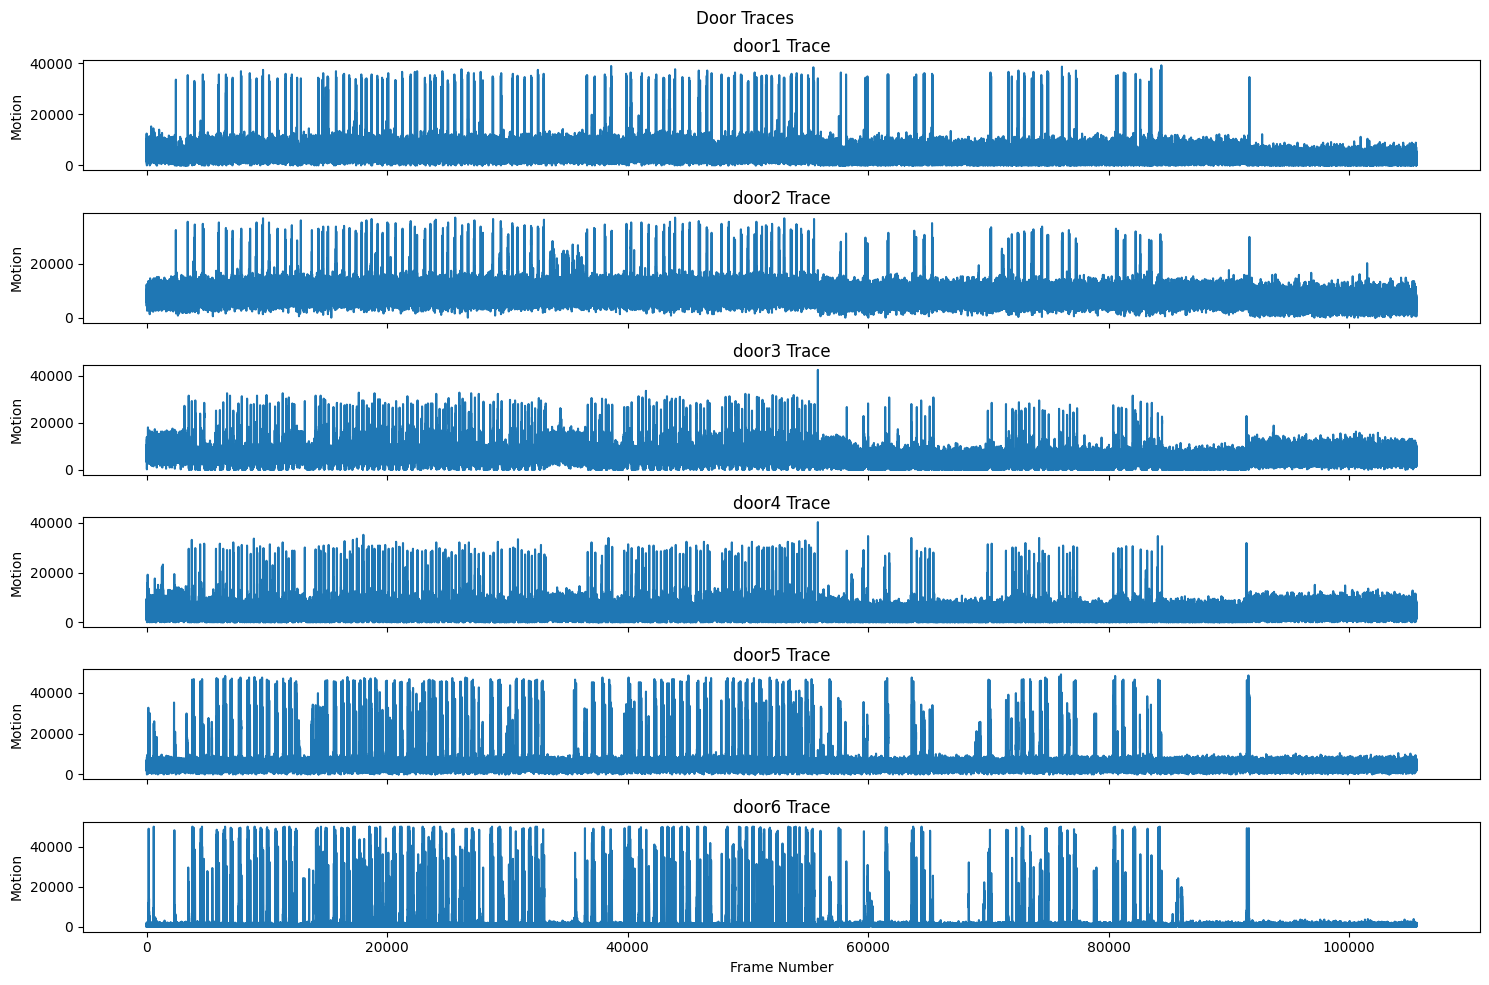

In [ ]:
# check that the extracted door traces are reliable
plotDoorTraces(data)

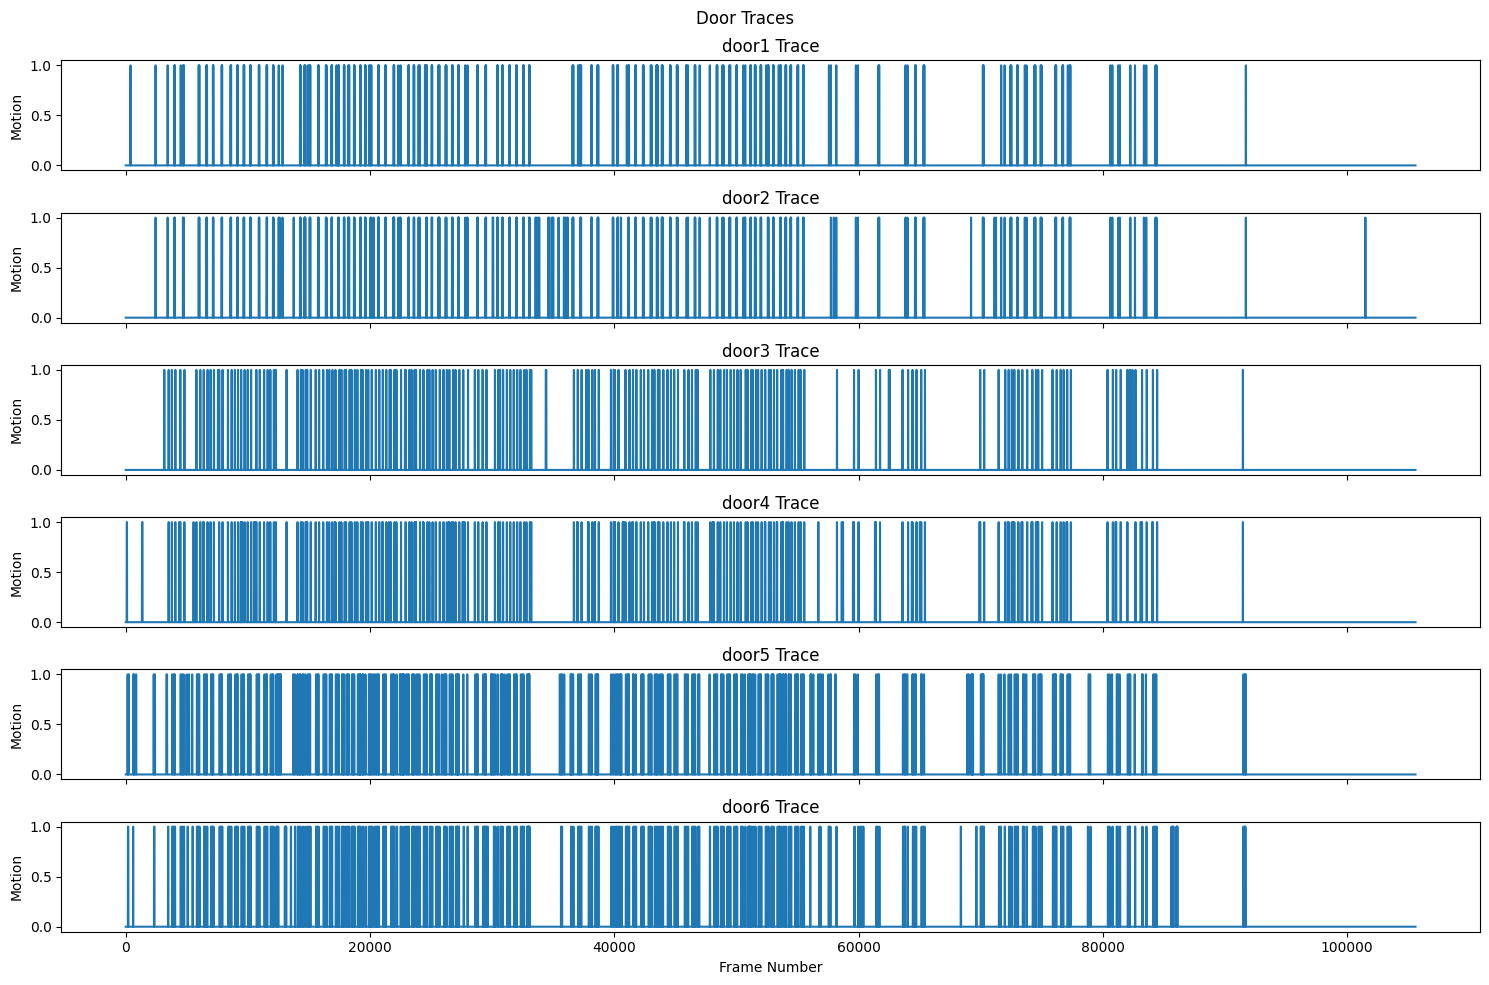

In [7]:
# Process the door traces
data = process_door_traces(data)

# Visualize result of processed data
plotDoorTraces(data)

In [ ]:
# Extract Trial Start and End Times from the door Traces
events = extract_trial_times(data)

Floor Starts: 155
Floor Ends: 155
Trial Starts: 103
Trial Ends: 103
Trial 0 likely has a missed detection in the doors 1 and 2
Trial 1 likely has a missed detection in the doors 1 and 2
Trial 2 likely has a missed detection in the doors 1 and 2
Trial 3 likely has a missed detection in the doors 1 and 2
Trial 4 likely has a missed detection in the doors 1 and 2
Trial 5 likely has a missed detection in the doors 1 and 2
Trial 6 likely has a missed detection in the doors 1 and 2
Trial 7 likely has a missed detection in the doors 1 and 2
Trial 8 likely has a missed detection in the doors 1 and 2
Trial 9 likely has a missed detection in the doors 1 and 2
Trial 10 likely has a missed detection in the doors 1 and 2
Trial 11 likely has a missed detection in the doors 1 and 2
Trial 12 likely has a missed detection in the doors 1 and 2
Trial 13 likely has a missed detection in the doors 1 and 2
Trial 14 likely has a missed detection in the doors 1 and 2
Trial 15 likely has a missed detection in 

In [9]:
# Verify that the number of detected trials matches the information in the json files
verify_correct_trial_times(events, jsonFiles)

Found 3 json files
Animal ID: ATO6
Working on file N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322_105751.json
Working on file N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322_111716.json
Working on file N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322_113320.json
Trial times verified successfully


True

In [10]:
# visualize metadata dictionary
print(metaData[100])

{'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,1', 'time_for_trial': 2, 'valve': 1, 'lick': 'right(V2)', 'trial_number': 19, 'trial_time': [2025, 3, 22, 11, 47, 10, 5, 81, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 5, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '0.5', 'coneHeight_2(floor2)': '1', 'Injection': '1'}


In [ ]:
# Load DLC dictionary from the H5 file
dlc_dict = load_deeplabcut_files(dlcFile)

# Match the mouse movements to the trials using time stamps from events
metaData = add_trajectories(metaData, dlc_dict, events)

# Specify location to save the metadata + trajectories
# This will be a json file that contains the metadata and the trajectories
savePath = r"N:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250322.json"

# Save the updated metadata dictionary to a json file
save_outDict(metaData, savePath)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Normalize the Traces and add to the json file dictionary (metadata)
metaData = normalize_trajectory(metaData, videoFile)

# Specificy save location for the normalized data

savePath = 
# Save the updated metadata dictionary to a json file
save_outDict(metaData, savePath)

In [ ]:
# Example Plotting Traces
plot_trajectory(metaData, videoFile)